<a href="https://colab.research.google.com/github/rugved2003/Machine-learning/blob/main/Iris_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing dependencies

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data collection and Data Processing

In [69]:
iris_dataset = pd.read_excel('/content/Iris..xlsx')

In [70]:
iris_dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [71]:
iris_dataset.shape

(150, 6)

In [72]:
iris_dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


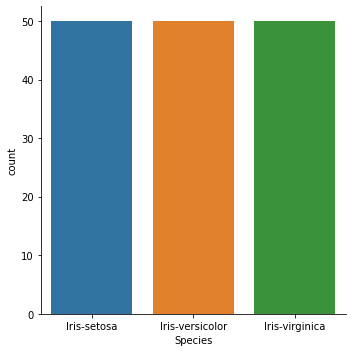

In [73]:
#number of values of each species valve
sns.catplot(x = 'Species',data = iris_dataset, kind = 'count')

In [74]:
#separating data and lables
X = iris_dataset.drop(labels=['Species','Id'],axis = 1)

print(X)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


In [75]:
Y = iris_dataset['Species']
print(Y)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object


Traing and teast data


In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=1)

In [77]:
print(Y.shape, Y_train.shape, Y_test.shape)

(150,) (120,) (30,)


In [78]:
print(X_train)
print(Y_train)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
21             5.1           3.7            1.5           0.4
47             4.6           3.2            1.4           0.2
141            6.9           3.1            5.1           2.3
90             5.5           2.6            4.4           1.2
64             5.6           2.9            3.6           1.3
..             ...           ...            ...           ...
41             4.5           2.3            1.3           0.3
93             5.0           2.3            3.3           1.0
26             5.0           3.4            1.6           0.4
3              4.6           3.1            1.5           0.2
42             4.4           3.2            1.3           0.2

[120 rows x 4 columns]
21         Iris-setosa
47         Iris-setosa
141     Iris-virginica
90     Iris-versicolor
64     Iris-versicolor
            ...       
41         Iris-setosa
93     Iris-versicolor
26         Iris-setosa
3          Iris-setosa
42

Model training ---> Logistic regression

In [79]:
model = LogisticRegression()

In [80]:
#training the logistic Regresssion model with traing data
model.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evalution

In [81]:
#accuracy on traing data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [82]:
print('Accuracy on training data :', training_data_accuracy)

Accuracy on training data : 0.9666666666666667


In [83]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [84]:
print('Accuracy on training data :', test_data_accuracy)

Accuracy on training data : 0.9666666666666667


Making a predictive System

In [89]:
input_data = (5.9,3,5.1,1.8)

#changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

['Iris-virginica']


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
